<a href="https://colab.research.google.com/github/IlyaS-26/Telecom/blob/main/lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа №10
Сергеев Илья, группа 3530901/90101

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

PI2 = 2 * np.pi

import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/archer-man/ThinkDSP/raw/master/code/thinkdsp.py
from thinkdsp import decorate

Упражнение 10.1

В разделе "Системы и свертка" на стр. 131 свертка описана как сумма сдвинутых и масштабированных копий сигнала.

А в разделе "Акустическая характеристика" на стр. 128 умножение ДПФ сигнала на передаточную функцию соответствует круговой свертке, но в предположении периодичности сигнала. В результате можно заметить, что на выходе, в начале фрагмента, слышна лишняя нота, "затекшая" из конца этого фрагмента.

К счастью, есть стандартное решение этой проблемы. Если перед вычислением ДПФ добавить достаточно нулей в конец сигнала, эффекта "заворота" можно избежать.

Измените пример в chap10.ipynb и убедитесь, что дополнение нулями устраняет лишнюю ноту в начале фрагмента.

Урежем оба сигнала до 2^16 элементов, а затем дополним их нулями до 2^17.

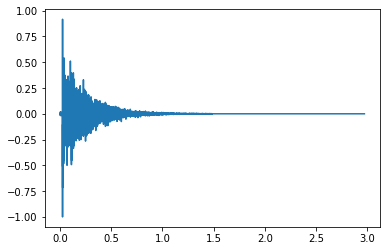

In [3]:
from thinkdsp import read_wave

if not os.path.exists('180960__kleeb__gunshot.wav'):
    !wget https://github.com/archer-man/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav
res = read_wave('180960__kleeb__gunshot.wav')
start = 0.12
res = res.segment(start=start)
res.shift(-start)
res.truncate(2**16)
res.zero_pad(2**17)
res.normalize()
res.plot()

Получим спектр

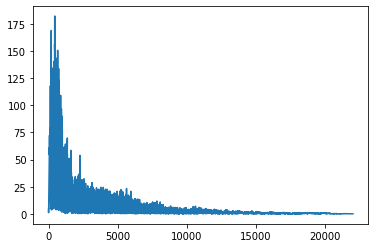

In [4]:
spec = res.make_spectrum()
spec.plot()

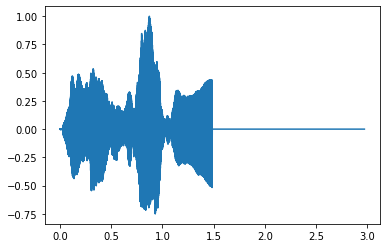

In [6]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/archer-man/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

violin = read_wave('92002__jcveliz__violin-origional.wav')
start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)
violin.truncate(2**16)
violin.zero_pad(2**17)
violin.normalize()
violin.plot()

Получим спектр

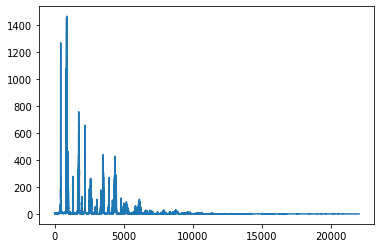

In [7]:
spectrum = violin.make_spectrum()
spectrum.plot()

Теперь умножим ДПФ сигнала на передаточную функцию и преобразуем обратно в волну.

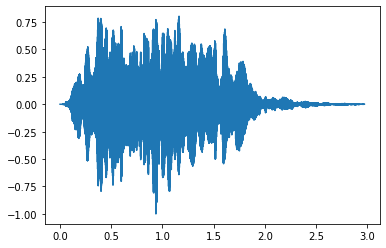

In [8]:
output = (spectrum * spec).make_wave()
output.normalize()
output.plot()
output.make_audio()

Теперь можно услышать, что лишней ноты в начале нет.

Упражнение 10.2

Возьмём один из звуков с ресура Open Air с испульсной харакеристикой. Дальше, найдём короткие записи с той же частотой дискретизации, что и у скачанной импульсной характеристики. Смоделируем
двумя способами звучание записи в том пространстве, где была измерена импульсная характеристика, как сверткой самой записи с импульсной характеристикой, так и умножением ДПФ записи на вычисленный фильтр, соответствующий импульсной характеристике.

In [ ]:
if not os.path.exists('impulse_task10.wav'):
    !wget https://github.com/archer-man/ThinkDSP/raw/master/code/impulse_task10.wav

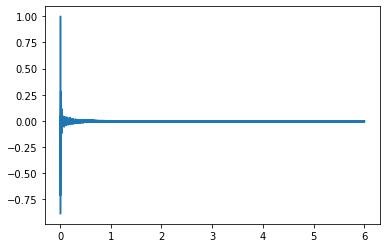

In [10]:
response = read_wave('impulse_task10.wav')
start = 0
duration = 6
response = response.segment(duration=duration)
response.shift(-start)
response.normalize()
response.plot()

Прослушаем

In [11]:
response.make_audio()

ДПФ импульсной характеристики:

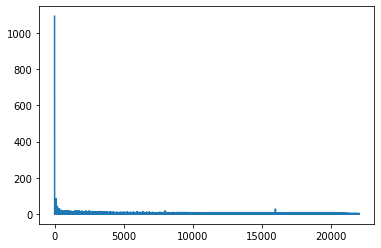

In [12]:
transfer = response.make_spectrum()
transfer.plot()

Представим в логарифмическом масштабе:

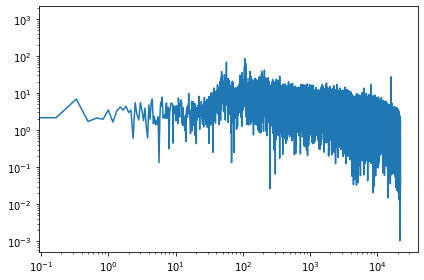

In [13]:
transfer.plot()
decorate(xscale='log', yscale='log')

Теперь мы можем смоделировать, как будет звучать запись, если она будет воспроизведена в той же комнате и записана таким же образом. Вот запись скрипки, которую мы использовали раньше:

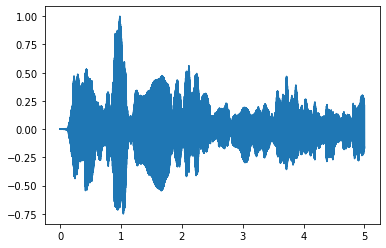

In [14]:
wave = read_wave('92002__jcveliz__violin-origional.wav')
start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)
wave.truncate(len(response))
wave.normalize()
wave.plot()

Так запись звучит до трансформации:

In [15]:
wave.make_audio()

Теперь вычислим ДПФ преобразования записи. Урежем запись до той же длины, что и импульсная характеристика.

In [16]:
spectrum = wave.make_spectrum()
len(spectrum.hs), len(transfer.hs)

(110251, 132301)

In [17]:
spectrum.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

In [18]:
transfer.fs

array([0.00000000e+00, 1.66666667e-01, 3.33333333e-01, ...,
       2.20496667e+04, 2.20498333e+04, 2.20500000e+04])

Умножим в частотной области и преобразуем обратно во временную область.

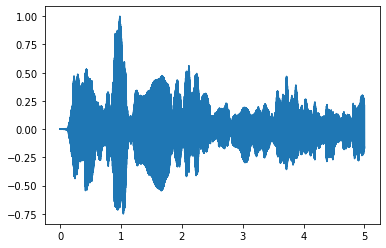

In [19]:
#output = (spectrum * transfer).make_wave()
output.normalize()
wave.plot()

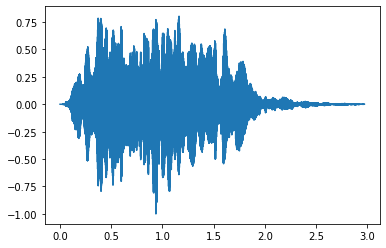

In [20]:
output.plot()

Получим звучание



In [22]:
output.make_audio()